In [81]:
import csv
import os
import json

In [82]:
import numpy as np
from pprint import pprint
from  sklearn.model_selection import train_test_split

In [83]:
import pandas as pd 
from pandas import Series, DataFrame

In [84]:
dataset = pd.read_csv("cleandata.csv")
#loading the cleandataset with Altmetrics features

In [85]:
listt=["mendeley_count","citeulike_count","connotea_count","blogs_count","news_count","facebook_count","googleplus_count","reddit_count"]
#The list is the features which we have extracted from JSON files

In [86]:
target_dataset = pd.read_csv("bigdatatarget.csv")
#the targetdata is load 

In [87]:
target_dataset.describe()

,twitter_count
count,235770.000000
mean,9.605539
std,63.812325
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,13718.000000


In [88]:
dataset_df = pd.DataFrame(dataset,columns= listt)

In [89]:
dataset_df.describe()

,mendeley_count,citeulike_count,connotea_count,blogs_count,news_count,facebook_count,googleplus_count,reddit_count
count,235770.000000,235770.000000,235770.000000,235770.000000,235770.000000,235770.000000,235770.000000,235770.000000
mean,11.950736,0.054121,0.006392,0.125563,0.743788,0.527336,0.072477,0.018098
std,42.469152,1.086926,0.349088,0.738875,6.762988,2.955149,0.954459,0.208076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12367.000000,387.000000,49.000000,59.000000,457.000000,411.000000,141.000000,21.000000


In [90]:
target_dataset_df = pd.DataFrame(target_dataset,columns= ["twitter_count"])

Populating the interactive namespace from numpy and matplotlib


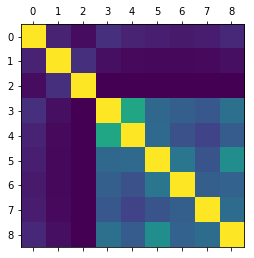

In [91]:
import matplotlib.pyplot as plt
%pylab inline
sample_dataframe = dataset_df
sample_dataframe["twitter"] = target_dataset_df
plt.matshow(sample_dataframe.corr())
#the below figure is the heat map for features with target features

# Correlation Coefficient 

In [92]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['mendeley_count'])
print(corel)

0.111057968093


In [93]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['citeulike_count'])
print(corel)

0.0409335196462


In [94]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['connotea_count'])
print(corel)

-0.000821883908942


In [95]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['blogs_count'])
print(corel)

0.369947651581


In [96]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['news_count'])
print(corel)

0.288494654766


In [97]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['facebook_count'])
print(corel)

0.487900992762


In [98]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['googleplus_count'])
print(corel)


0.312678284114


In [99]:
corel = target_dataset_df["twitter_count"].corr(dataset_df['reddit_count'])
print(corel)

0.353231360281


In [100]:
random_num = np.random
train_data,test_data,train_targets,test_targets = train_test_split(dataset_df,target_dataset_df,test_size=0.2,train_size=0.8,random_state=random_num)

In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [102]:
lin_reg.fit(train_data,train_targets)
lin_targets = lin_reg.predict(test_data)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
lin_mse = mean_squared_error(test_targets,lin_targets)
line_rss = r2_score(test_targets,lin_targets)

In [104]:
line_rss
#the rsquare value is near to one which means the model is performing good

1.0

In [105]:
print("%.5f" % lin_mse)

0.00000


In [106]:
print(test_targets)

        twitter_count
188347              1
150062              1
167012              3
72937               4
224703             76
42316               2
45971               2
170148              7
15504              10
105036              9
87690               2
120956              8
174348              1
179755              1
10533               1
95869               1
86333               3
116827              1
38365               1
189003             10
26672               1
135914              9
169140              2
102656              1
50709               5
98600               8
45617               3
137571              1
90689               3
80190               3
...               ...
17154               2
186683              1
216325             24
11391               1
211662              6
171361              4
24872               2
5060                1
49695              26
152454              3
24565               1
149179              3
139548              2
186861    

In [107]:
print(lin_targets)

[[ 1.]
 [ 1.]
 [ 3.]
 ..., 
 [ 1.]
 [ 2.]
 [ 6.]]


In [108]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)

In [109]:
lasso_reg.fit(train_data,train_targets)
lasso_reg_targets =lasso_reg.predict(test_data)

In [110]:
lasso_mse = mean_squared_error(test_targets,lasso_reg_targets)
lasso_rss = r2_score(test_targets,lasso_reg_targets)

In [111]:
lasso_mse
#meansquare error is having bit high than linear regression 

2.0381808409220659e-06

In [112]:
lasso_rss

0.99999999943142948

In [113]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data,train_targets)

C:\Users\SatyaKrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
rf_targets = forest_reg.predict(test_data)
rf_mse = mean_squared_error(test_targets,rf_targets)
rf_rss = r2_score(test_targets, rf_targets)
#Random Forest is having high mean square error that means the model is not performing well 

In [115]:
rf_mse

6.8551255460830465

In [116]:
rf_rss

0.9980876954694502

In [117]:
lasso_reg_targets

array([ 1.00020475,  1.00020475,  3.00015706, ...,  1.00020475,
        2.0001809 ,  6.00008552])

In [118]:
test_targets

,twitter_count
188347,1
150062,1
167012,3
72937,4
224703,76
42316,2
45971,2
170148,7
15504,10
105036,9


In [119]:
import numpy as np
from pprint import pprint
from  sklearn.model_selection import train_test_split
from  sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [120]:
import pandas as pd 
from pandas import Series, DataFrame

In [137]:
dataset = pd.read_csv("cleanest.csv")
list1=["mendeley_count","blogs_count","news_count","citeulike_count","connotea_count","facebook_count","googleplus_count","reddit_count"]
dataset_df = pd.DataFrame(dataset,columns= list1)
dataset_df.describe()

,mendeley_count,blogs_count,news_count,citeulike_count,connotea_count,facebook_count,googleplus_count,reddit_count
count,235239.000000,235239.000000,235239.000000,235239.000000,235239.000000,235239.000000,235239.000000,235239.000000
mean,11.751274,0.114220,0.663117,0.052955,0.006406,0.465450,0.058736,0.014874
std,40.685292,0.627356,5.683496,1.085140,0.349482,2.078689,0.792668,0.157251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12367.000000,59.000000,340.000000,387.000000,49.000000,411.000000,138.000000,8.000000


In [138]:
target_dataset = pd.read_csv("targetsdata.csv")
target_dataset_df = pd.DataFrame(target_dataset,columns= ["twitter_count"])
target_dataset_df.describe()
#In Targetsdata.csv will contain the data without outliers.To reduce the outliers we have kept an margin for tweet counts as 350 because there is 
#gradual increase in tweet counts so we have used that target column in new file.

,twitter_count
count,235239.000000
mean,7.766982
std,20.561184
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,350.000000


In [139]:
target_dataset_df["twitter_class"] = 0
target_dataset_df["twitter_class"][(target_dataset_df["twitter_count"] > 7)] = 1

In [140]:
target_dataset_df

,twitter_count,twitter_class
0,2,0
1,2,0
2,1,0
3,4,0
4,38,1
5,1,0
6,8,1
7,2,0
8,1,0
9,2,0


In [141]:
random_num = np.random
train_data,test_data,train_targets,test_targets = train_test_split(dataset_df,target_dataset_df['twitter_class'],test_size=0.2,train_size=0.8,random_state=42)


Populating the interactive namespace from numpy and matplotlib


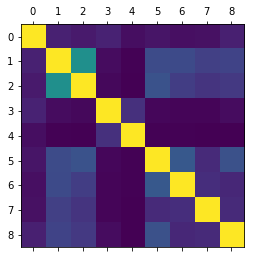

In [142]:
import matplotlib.pyplot as plt
%pylab inline
sample_dataframe = dataset_df
sample_dataframe["twitter"] = target_dataset_df['twitter_class']
plt.matshow(sample_dataframe.corr())


In [143]:
DTC = DecisionTreeClassifier(criterion = "gini",random_state=0)
DTC.fit(train_data,train_targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [144]:
predict_DTC = DTC.predict(test_data)

In [145]:
predict_DTC.shape

(47048,)

In [146]:
test_targets.shape

(47048,)

In [147]:
NBC = BernoulliNB()
NBC.fit(train_data,train_targets)
predict_NBC = NBC.predict(test_data)

In [148]:
RFC = RandomForestClassifier()
RFC.fit(train_data,train_targets)
predict_RFC = RFC.predict(test_data)

In [149]:
class_labels = ['class0','class1']
print(classification_report(test_targets,predict_DTC,target_names=class_labels))
accuracy_score(test_targets,predict_DTC)
#decision tree classification performs good but has less precision and recall values than Random Forest Clasification  

             precision    recall  f1-score   support

     class0       0.84      0.97      0.90     37624
     class1       0.70      0.26      0.38      9424

avg / total       0.81      0.83      0.80     47048



0.8300884203366774

In [150]:
print(classification_report(test_targets,predict_NBC,target_names=class_labels))
accuracy_score(test_targets,predict_NBC)

             precision    recall  f1-score   support

     class0       0.84      0.96      0.90     37624
     class1       0.64      0.27      0.38      9424

avg / total       0.80      0.82      0.79     47048



0.82371195374936235

In [151]:
print(classification_report(test_targets,predict_RFC,target_names=class_labels))
from sklearn.metrics import accuracy_score
accuracy_score(test_targets,predict_RFC)
#the accuracy for Random Forest Classification is good and performs better than other classification models.

             precision    recall  f1-score   support

     class0       0.84      0.97      0.90     37624
     class1       0.70      0.28      0.40      9424

avg / total       0.82      0.83      0.80     47048



0.83221390919911575